In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

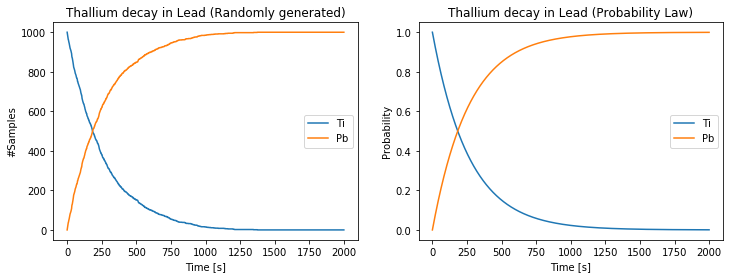

In [2]:
samples=1000 # there are 1000 atoms
time_interval=2000 # seconds range 
Ti_current=np.ones(samples)
Pb_current=np.zeros(samples)
Ti_time=np.empty(time_interval)
Pb_time=np.empty(time_interval)
Ti_time[0]=np.sum(Ti_current)
Pb_time[0]=np.sum(Pb_current)
tau=3.052*60 # half-life in seconds
for t in range (1,time_interval):
    for i in range(samples):
        if (np.random.uniform()<=1.-2**(-1/tau)): # we put 1/tau instead of t/tau because we compute each time step separately
            Ti_current[i]=0
            Pb_current[i]=1
    Ti_time[t]=np.sum(Ti_current)
    Pb_time[t]=np.sum(Pb_current)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(Ti_time,label='Ti')
plt.plot(Pb_time,label='Pb')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('#Samples')
plt.title('Thallium decay in Lead (Randomly generated)')
plt.subplot(122)
xs = np.linspace(0, time_interval, time_interval)
ys = np.exp2(-xs/tau)
plt.plot(xs, ys, label='Ti')
zs = 1-np.exp2(-xs/tau) 
plt.plot(xs, zs, label='Pb')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Probability')
plt.title('Thallium decay in Lead (Probability Law)')
plt.show()

# Mathematical refresh
Let's call $N(t)$ the number of atoms of Thallium and time t and $N_0$ the initial value, we have
$$
N(t)=N_0 e^{-\mu t}=N_0 2^{-\frac{\mu t}{\ln 2}}=N_0 2^{-\frac{t}{\tau}} \quad \text{where} \quad \tau=\frac{\ln 2}{\mu}
$$.
Now calling p(t) the probability that a Thallium atom has decayed we have
$$
p(t)=1-\frac{N(t)}{N_0}=1-2^{-\frac{t}{\tau}}=1-e^{-\mu t}
$$.


# Inverse transform method
Since the exponential $p(x) = \mu e^{-\mu x}$ which expresses the probability of a decay at a certain time, leads to the quantile function $x(z) = - \frac{1}{\mu}\log(1-z)$ which expresses the probability distribution of the decay times, To match the function $p(t)=\frac{\ln 2}{\tau}2^{-t/\tau}$ we have to impose $\mu=\frac{\ln 2}{\tau}$. In fact
$$p(t)=\frac{\ln 2}{\tau}2^{-t/\tau}=\frac{\ln 2}{\tau}2^{\frac{-t\ln 2}{\tau \ln 2}}=\mu2^{\frac{-t\mu}{\ln 2}}=\mu e^{-\mu t}$$
where the last step holds since $2=e^{\ln 2}$ which implies $2^\frac{1}{\ln 2}=e$

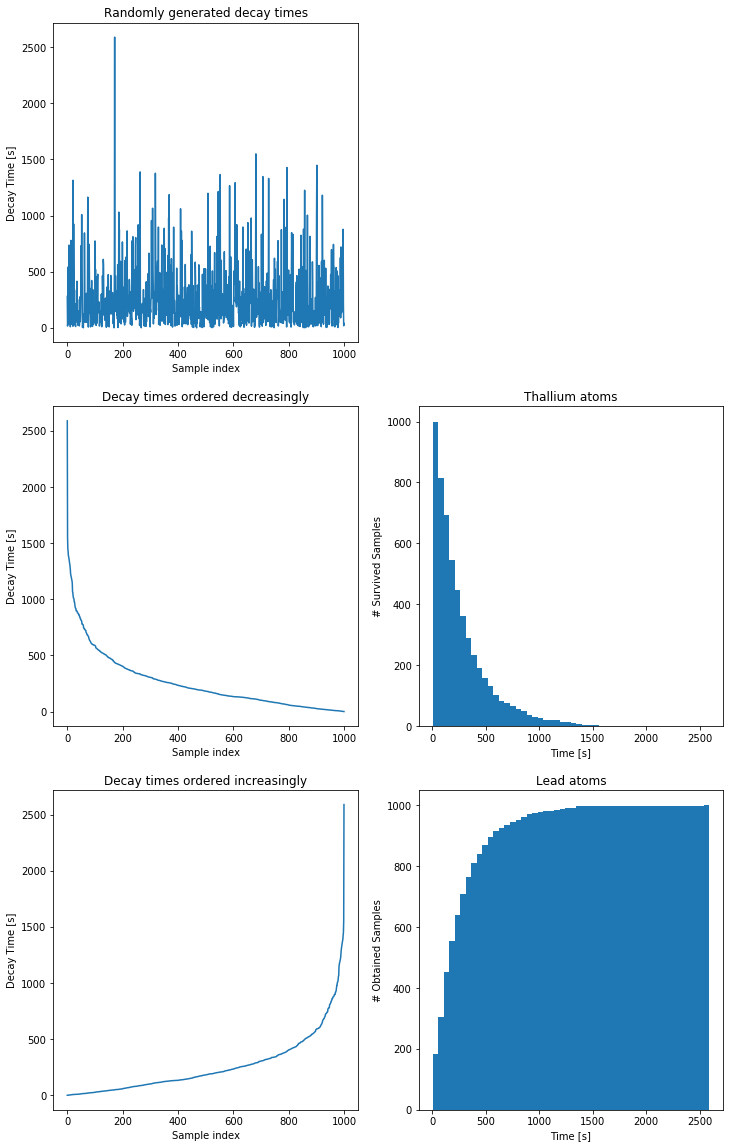

In [3]:
samples=1000 # there are 1000 atoms
def expon_icdf(p, mu=np.log(2)/tau):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/mu
# we start from a uniform random distribution to obtain the one we are looking for
decay_times = expon_icdf(np.random.random(samples)) #uses random.random insted of random.uniform to avoid error with log
plt.figure(figsize=(12,20))
plt.subplot(321)
plt.title('Randomly generated decay times')
plt.plot(decay_times)
plt.xlabel('Sample index')
plt.ylabel('Decay Time [s]')
plt.subplot(323)
plt.title('Decay times ordered decreasingly')
plt.plot(np.sort(decay_times)[::-1])
plt.xlabel('Sample index')
plt.ylabel('Decay Time [s]')
plt.subplot(324)
plt.title('Thallium atoms')
plt.hist(decay_times,bins=50, cumulative=-1) # cumulative option enabled ensures that the first bin has 1000 entries
#cumulative=-1 means that the it is going from the maximum bin to the minimum decreasing
plt.xlabel('Time [s]')
plt.ylabel('# Survived Samples')
plt.subplot(325)
plt.title('Decay times ordered increasingly')
plt.plot(np.sort(decay_times))
plt.xlabel('Sample index')
plt.ylabel('Decay Time [s]')
plt.subplot(326)
plt.title('Lead atoms')
plt.hist(decay_times,bins=50, cumulative=1)  # cumulative option enabled ensures that the last bin has 1000 entries
#cumulative=1 means that the it is going from the minimum bin to the maximum increasing
plt.xlabel('Time [s]')
plt.ylabel('# Obtained Samples')
plt.show()

# Important remark
Note that cumulative binning correspond to inverting the function

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

# Solution
First of all from the Rutherford experiment we exped the fraction to be something like $\frac{1}{20000}=5*10^{-5}$ <br>
The impact parameter ${\displaystyle b}$ is defined as the perpendicular distance between the path of a projectile and the center of a potential field ${\displaystyle U(r)}$ created by an object that the projectile is approaching. <br>
The solution is based on the Box-Muller method that allows to apply the Inverse transform method for the gaussian

In [4]:
N=1000000
a0=0.529*10**(-9)
g = np.random.random(N)
b = np.sqrt(-2*(a0/100)**(2)*np.log(1-g)) # Box-Muller Method
Z=79
e=1.609*10**(-19)
eps0=8.89*10**(-12)
E=7.7*1.609*10**(-13)
const=Z*e**2/(2*np.pi*eps0*E)
theta=2*np.arctan(const/b)
len(theta[theta>np.pi/2])/N #after selecting angles > 90 degrees we divide the number of particles by the total number

1.7e-05

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [93]:
correct=1.4514 # correct result for the integral
def f(x):
    return (np.sin(1/(x*(2-x))))**2
# Monte Carlo integration
N=1000000
count=0
for i in range(N):
    # x is between 0 and 2 while y is between 0 and 1
    x=2*np.random.random() # multiply by 2 because we want random numbers in the range of the function which is [0,2]
    y=np.random.random()
    if y<f(x): count+=1
A=2*1 #area of the box given by x-domain times maximum of f(x)
I=A*count/N
print('Result with hit/miss method:',np.round(I,6), 'error:',np.abs(np.round((I-correct),6)))

Result with hit/miss method: 1.450158 error: 0.001242


In [94]:
correct=1.4514 # correct result for the integral
def f(x):
    return (np.sin(1/(x*(2-x))))**2
# Monte Carlo integration
N=1000000
x=2*np.random.random(N) # multiply by 2 because we want random numbers in the range of the function which is [0,2]
I=2/N*np.sum(f(x))
print('Result with mean value method:',np.round(I,6), 'error:',np.abs(np.round((I-correct),6)))

Result with mean value method: 1.452018 error: 0.000618


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



# Hit/miss method for 2D (slow)

In [95]:
correct=np.pi # correct result for the integral
N=1000000
count=0
for i in range(N): 
    x=2*np.random.random()-1 # draw random uniform from -1 to 1 for x
    y=2*np.random.random()-1 # draw random uniform from -1 to 1 for y
    if x**2+y**2<=1:
        count+=1
A=(2**2)*1 #area of the box given by xy-domain times maximum of f(x) which is 1
I=A*count/N
print('Result with hit/miss method:',np.round(I,6), 'error:',np.abs(np.round(I-correct,6)))

Result with hit/miss method: 3.14426 error: 0.002667


# Mean value method for 2D (fast)

In [96]:
correct=np.pi # correct result for the integral
def f(x,y):
    if (x**2+y**2)<=1:
        return 1
    else:
        return 0
ff = np.vectorize(f) # since in the function f we use if condition but pass numpy array as argument we must vectorize
                     # to explain it has to work on each element separately
N=1000000
x=2*np.random.random(N)-1 # draw random uniform from -1 to 1 for x
y=2*np.random.random(N)-1 # draw random uniform from -1 to 1 for y
V=2**2 # volume
I=V/N*np.sum(ff(x,y))
print('Result with mean value method:',np.round(I,6), 'error:',np.abs(np.round(I-correct,6)))

Result with mean value method: 3.139836 error: 0.001757


# Hit/miss method for 10D (very slow)

In [97]:
correct=np.pi**5/(120)  # correct result for the integral
N=1000000
count=0
for i in range(N):
    x=2*np.random.rand(10)-1 # draw 10 random coordinates uniformly distributed from -1 to 1
    r=(x**2).sum()
    if r<=1:
        count+=1
A=(2**10)*1 #area of the box given by 10D-domain times maximum of f(x) which is 1
I=A*count/N
print('Result with hit/miss method:',np.round(I,6), 'error:',np.abs(np.round((I-correct),6)))

Result with hit/miss method: 2.510848 error: 0.039316


# Mean value method for 10D (fast)

In [98]:
correct=np.pi**5/(120) # correct result for the integral
def f(r):
    if r<=1:
        return 1
    else:
        return 0
ff = np.vectorize(f) # since in the function f we use if condition but pass numpy array as argument we must vectorize
                     # to explain it has to work on each element separately
N=1000000
x=2*np.random.random(N*10)-1 # draw random uniform from -1 to 1 for 10 dimensions
x=x.reshape(N,10)
V=2**10 # volume
I=V/N*np.sum(ff(np.sqrt(np.sum(x**2, axis=1))))
print('Result with mean value method:',np.round(I,6), 'error:',np.abs(np.round(I-correct,6)))

Result with mean value method: 2.588672 error: 0.038508


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [102]:
correct=0.83893
N=1000000
def f(x):
    return x**(-1/2)/(np.exp(x)+1)

def w(x):
    return x**(-1/2)

x=np.random.random(N)
V=2 # what in the mean value method was the volume now becomes the integral of w(x) in the domain
I=1/N*np.sum(f(x)/w(x))*V

print('Result with importance sampling method:',np.round(I,6), 'error:',np.abs(np.round(I-correct,6)))

Result with importance sampling method: 0.759602 error: 0.079328
